# *Proyecto Final - DAFT10 - Henry*
Spirit Liquors - El capital Oculto

            Grupo 02: 
                 Angela Gaviria
                 Diego Diaz
                 Germán Presa
                 Gonzalo Aguirre

# *0- Configuración del entorno*

## 0.1 Intalación de Librerias a utilizar.

In [ ]:
# Instalo librerias para el caso que no esten
 
%pip install kaggle pandas numpy matplotlib seaborn wrangler datetime geopandas geopy pyodbc sqlalchemy 



  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [196]:
# Lista todas las librerías y versiones instaladas en tu entorno de Python, y las guardo en un .txt para el momento de compartirlas

! pip freeze > requirements.txt 

## 0.2 Importación de Librerias a utilizar.

In [197]:
# Importar librerías necesarias 

import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from matplotlib.dates import DateFormatter # type: ignore

## 0.3 Descarga de DataSet

In [198]:
import os
import time
import zipfile  # Para manejar archivos ZIP
from kaggle.api.kaggle_api_extended import KaggleApi
from datetime import datetime

# Configuración del archivo de autenticación de Kaggle
kaggle_json_path = r"C:\Users\Lenovo\.kaggle\kaggle.json"
os.environ['KAGGLE_CONFIG_DIR'] = os.path.dirname(kaggle_json_path)

# Inicializar la API de Kaggle
try:
    api = KaggleApi()
    api.authenticate()
except Exception as e:
    print(f"Error en la autenticación de Kaggle: {e}")
    exit(1)

# Dataset que queremos descargar
dataset = "bhanupratapbiswas/inventory-analysis-case-study"

# Directorio de salida
output_path = r"C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet"
os.makedirs(output_path, exist_ok=True)

# Archivo de registro para la última descarga
log_file_path = os.path.join(output_path, "last_download.log")

# Eliminar archivos ZIP previos en la carpeta
zip_files = [f for f in os.listdir(output_path) if f.endswith('.zip')]
for zip_file in zip_files:
    try:
        os.remove(os.path.join(output_path, zip_file))
    except Exception as e:
        print(f"Error al eliminar archivo previo {zip_file}: {e}")

# Descargar el dataset
print("Descargando dataset...")
try:
    api.dataset_download_files(dataset, path=output_path, unzip=False)
    print("Descarga iniciada...")
except Exception as e:
    print(f"Error en la descarga: {e}")
    exit(1)

# Esperar hasta que el archivo aparezca en la carpeta
timeout = 30  # Tiempo máximo de espera en segundos
elapsed_time = 0
zip_file_path = None  # Inicializar la variable antes del bucle

print("Esperando a que el archivo ZIP aparezca en la carpeta...")

while elapsed_time < timeout:
    zip_files = [f for f in os.listdir(output_path) if f.endswith('.zip')]
    if zip_files:
        zip_file_path = os.path.join(output_path, zip_files[0])  # Tomar el primer archivo ZIP encontrado
        print(f"Archivo ZIP encontrado: {zip_file_path}")
        break  # Salir del bucle si se encuentra el archivo
    time.sleep(2)  # Esperar 2 segundos antes de volver a verificar
    elapsed_time += 2

# Verificar si realmente se encontró el archivo ZIP
if zip_file_path is None or not os.path.exists(zip_file_path):
    print(f"Error: No se encontró ningún archivo ZIP después de {timeout} segundos.")
    exit(1)

# Esperar a que la descarga finalice completamente (verificando el tamaño del archivo)
previous_size = -1
while True:
    current_size = os.path.getsize(zip_file_path)
    if current_size == previous_size:  # Si el tamaño no cambia en 4 segundos, la descarga terminó
        print("Descarga finalizada correctamente.")
        break
    previous_size = current_size
    time.sleep(4)

# Descomprimir el archivo ZIP
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_path)
        print("Archivo descomprimido exitosamente.")

    # Eliminar el archivo ZIP después de extraerlo
    os.remove(zip_file_path)
    print("Archivo ZIP eliminado.")
except Exception as e:
    print(f"Error al descomprimir el archivo: {e}")
    exit(1)

# Guardar el timestamp de la descarga en un archivo de log
try:
    with open(log_file_path, "w") as log_file:
        log_file.write(f"Última descarga: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    print("Registro de descarga actualizado.")
except Exception as e:
    print(f"Error al escribir en el archivo de log: {e}")




Descargando dataset...
Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/inventory-analysis-case-study
Error en la descarga: time data 'Thu, 13 Jul 2023 04:05:40 GMT' does not match format '%a, %d %b %Y %H:%M:%S %Z'
Esperando a que el archivo ZIP aparezca en la carpeta...


KeyboardInterrupt: 

In [199]:
# Leer el archivo CSV
df_productos = pd.read_csv(r'C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet\2017PurchasePricesDec.csv', index_col=None)
df_inv_inicial = pd.read_csv(r'C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet\BegInvFINAL12312016.csv', index_col=None)
df_inv_final = pd.read_csv(r'C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet\EndInvFINAL12312016.csv', index_col=None)
df_proveedores = pd.read_csv(r'C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet\InvoicePurchases12312016.csv', index_col=None)
df_compras = pd.read_csv(r'C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet\PurchasesFINAL12312016.csv', index_col=None)
df_ventas = pd.read_csv(r'C:\Users\Lenovo\Documents\henry da-ft10\Proyecto Final\DataSet\SalesFINAL12312016.csv', index_col=None)

## 0.4 Conexión de Python a SQL Server en Cluod SQL

In [ ]:
# Conectar Python a SQL Server en Cloud SQL

import pyodbc
from sqlalchemy import create_engine

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"
DB_NAME = "SpiritLiquor"
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión con ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

# Crear conexión con pyodbc
try:
    conn = pyodbc.connect(conn_str)
    print(" Conexión exitosa a Cloud SQL")
except Exception as e:
    print(f" Error en la conexión: {e}")

# Conexión con SQLAlchemy para manipulación de datos
engine = create_engine(f"mssql+pyodbc://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}?driver=ODBC+Driver+17+for+SQL+Server")

 Conexión exitosa a Cloud SQL


# *1- Creación de Base de Datos y Tablas*

## 1.1 Creación de la Base de Datos

In [ ]:
import pyodbc

# Crear la base de datos en caso de que no exista

# Configuración de conexión (sin base de datos específica)
DB_HOST = "34.176.175.250"
DB_PORT = "1433"
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Conexión al servidor sin especificar la base de datos
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST},{DB_PORT};UID={DB_USER};PWD={DB_PASSWORD}"

try:
    # Conectar al servidor de SQL Server
    conn = pyodbc.connect(conn_str, autocommit=True)  # 🔹 Activar autocommit para evitar la transacción
    cursor = conn.cursor()

    # Crear la base de datos solo si no existe
    cursor.execute("IF NOT EXISTS (SELECT * FROM sys.databases WHERE name = 'SpiritLiquor') CREATE DATABASE SpiritLiquor;")
    
    print("✅ Base de datos 'SpiritLiquor' creada exitosamente o ya existía.")

except Exception as e:
    print(f"❌ Error al crear la base de datos: {e}")

finally:
    cursor.close()
    conn.close()


✅ Base de datos 'SpiritLiquor' creada exitosamente o ya existía.


## 1.2 Creación de Tablas

In [ ]:
import pyodbc

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"  # Reemplaza con la IP de tu instancia en GCP
DB_NAME = "SpiritLiquor"  # Nombre de tu base de datos
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

# Script SQL para crear las tablas
sql_script = """
-- Tabla de tiendas
CREATE TABLE dim_store (
    id_store INT PRIMARY KEY NOT NULL,
    city VARCHAR(100)
);

-- Tabla de proveedores
CREATE TABLE dim_vendors (
    id_vendors_number INT PRIMARY KEY NOT NULL,
    vendors_name VARCHAR(100) UNIQUE
);

-- Tabla de productos
CREATE TABLE dim_products (
    id_brand INT PRIMARY KEY NOT NULL,
    description VARCHAR(100),
    size VARCHAR(100),
    volume DECIMAL(15, 2),
    purchase_price DECIMAL(15, 2),
    sales_price DECIMAL(15, 2),
    classification INT,
    id_vendors_number INT,
    FOREIGN KEY (id_vendors_number) REFERENCES dim_vendors(id_vendors_number)
);

-- Tabla de facturas de compra
CREATE TABLE dim_invoice_purchase (
    id_po_number INT PRIMARY KEY NOT NULL,
    id_vendors_number INT,
    po_date DATE,
    pay_date DATE,
    total_quantity INT,
    total_amount DECIMAL(15, 2),
    freight DECIMAL(15, 2),
    approval VARCHAR(100),
    FOREIGN KEY (id_vendors_number) REFERENCES dim_vendors(id_vendors_number)
);

-- Tabla de inventario
CREATE TABLE facts_inventario (
    id_inventario INT PRIMARY KEY NOT NULL IDENTITY(1,1),
    id_store INT,
    id_brand INT,
    on_hands INT CHECK (on_hands >= 0),
    sales_price DECIMAL(15, 2),
    dates DATE DEFAULT GETDATE(),
    id_purchases INT,
    id_sales INT,
    FOREIGN KEY (id_store) REFERENCES dim_store(id_store),
    FOREIGN KEY (id_brand) REFERENCES dim_products(id_brand)
);

-- Tabla de ventas
CREATE TABLE sales (
    id_sales INT PRIMARY KEY NOT NULL IDENTITY(1,1),
    id_inventario INT,
    id_store INT,
    id_vendors_number INT,
    id_brand INT,
    sales_date DATE,
    quantity_sales INT,
    sales_price DECIMAL(15, 2),
    total_amount DECIMAL(15, 2),
    excise_tax DECIMAL(15, 2),
    FOREIGN KEY (id_inventario) REFERENCES facts_inventario(id_inventario),
    FOREIGN KEY (id_store) REFERENCES dim_store(id_store),
    FOREIGN KEY (id_vendors_number) REFERENCES dim_vendors(id_vendors_number),
    FOREIGN KEY (id_brand) REFERENCES dim_products(id_brand)
);

-- Tabla de compras
CREATE TABLE purchase (
    id_purchases INT PRIMARY KEY NOT NULL IDENTITY(1,1),
    id_inventario INT,
    id_store INT,
    id_brand INT,
    id_vendor_number INT,
    id_po_number INT,
    receiving_date DATE,
    purchase_price DECIMAL(15, 2),
    quantity_purchases INT,
    total_price DECIMAL(15, 2),
    FOREIGN KEY (id_inventario) REFERENCES facts_inventario(id_inventario),
    FOREIGN KEY (id_store) REFERENCES dim_store(id_store),
    FOREIGN KEY (id_brand) REFERENCES dim_products(id_brand),
    FOREIGN KEY (id_vendor_number) REFERENCES dim_vendors(id_vendors_number)
);
"""

try:
    # Conectar a la base de datos
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Ejecutar el script SQL para crear las tablas
    cursor.execute(sql_script)
    conn.commit()

    print("Tablas creadas exitosamente en SQL Server.")

except Exception as e:
    print(f"Error al crear las tablas: {e}")

finally:
    cursor.close()
    conn.close()


✅ Tablas creadas exitosamente en SQL Server.


# *2- Extracción y Transformación de datos*

## 2.1 Tabla a analizar 2017PuchasePricesDec

### 2.1.1 Carga y visualización

In [336]:
# Lee el archivo CSV con el delimitador especificado

df_pur = pd.read_csv('2017PurchasePricesDec.csv', sep=',')

In [337]:
# Verificamos tipo de datos
print(df_pur.dtypes)

Brand               int64
Description        object
Price             float64
Size               object
Volume             object
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object


In [338]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_pur.shape}")

Tamaño del DataFrame: (12261, 9)


In [339]:
# Mostrar las primeras filas para entender la estructura de los datos

print(df_pur.head()) 

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [340]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_pur.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


In [341]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)

# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format

print(df_pur.describe())

          Brand     Price  Classification  PurchasePrice  VendorNumber
count 12,261.00 12,261.00       12,261.00      12,261.00     12,261.00
mean  17,989.07     38.64            1.71          26.49     10,814.86
std   12,528.50    206.15            0.45         156.18     19,007.68
min       58.00      0.00            1.00           0.00          2.00
25%    5,990.00     10.99            1.00           6.89      3,960.00
50%   18,788.00     15.99            2.00          10.65      7,153.00
75%   25,117.00     29.99            2.00          20.13      9,552.00
max   90,631.00 13,999.90            2.00      11,111.03    173,357.00


### 2.1.2 Verificación de nulos y duplicados por dato.

In [342]:
#cantidad de duplicados
df_pur.duplicated().sum()

np.int64(0)

In [343]:
# Calcular la cantidad de valores NaN por columna
pur_nan = df_pur.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
pur_porcentaje_nan = (pur_nan / len(df_pur)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
pur_nan_info = pd.DataFrame({
    'Cantidad NaN': pur_nan,
    'Porcentaje NaN (%)': pur_porcentaje_nan
})

# Filtrar el DataFrame para mostrar solo las columnas con cantidad NaN > 0
pur_nan_info = pur_nan_info[pur_nan_info['Cantidad NaN'] > 0]

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(pur_nan_info)

             Cantidad NaN  Porcentaje NaN (%)
Description             1                0.01
Size                    1                0.01
Volume                  1                0.01


se puede observar que es una tabla de articulos, por lo cual en la limpieza los valores nulos se dejaran como indefinidos

### 2.1.3 Limpieza de Datos - Manejo de valores nulos

In [344]:
# Limpiar valores nulos
df_pur['Description'] = df_pur['Description'].fillna('undefined')
df_pur['Size'] = df_pur['Size'].fillna('undefined')
df_pur['Volume'] = df_pur['Volume'].fillna('undefined')

In [345]:
# Verificación de la cantidad de valores nulos en cada columna

print("Valores nulos después de la limpieza:\n", df_pur.isnull().sum())

Valores nulos después de la limpieza:
 Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


Se verifica la inexistencia de nulos

In [346]:
# Seleccionar solo los campos necesarios y renombrarlos según el formato de la imagen
df_dim_products = df_pur.rename(columns={
    'Brand': 'ID_Brand',
    'Description': 'Description',
    'Size': 'Size',
    'Volume': 'Volume',
    'Price': 'Price',
    'PurchasePrice': 'PurchasePrice',
    'Classification': 'Classification',
    'VendorNumber': 'id_vendor_number'
})[['ID_Brand', 'Description', 'Size','Volume' , 'Price', 'PurchasePrice', 'Classification', 'id_vendor_number']]

df_dim_products

,ID_Brand,Description,Size,Volume,Price,PurchasePrice,Classification,id_vendor_number
0,58,Gekkeikan Black & Gold Sake,750mL,750,12.99,9.28,1,8320
1,62,Herradura Silver Tequila,750mL,750,36.99,28.67,1,1128
2,63,Herradura Reposado Tequila,750mL,750,38.99,30.46,1,1128
3,72,No. 3 London Dry Gin,750mL,750,34.99,26.11,1,9165
4,75,Three Olives Tomato Vodka,750mL,750,14.99,10.94,1,7245
...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,750mL,750,24.99,16.55,2,90024
12257,44944,Sanford Santa Rita Pnt Nr,750mL,750,22.99,14.93,2,4425
12258,45016,Neal One Lane Bridg Cab Svgn,750mL,750,93.99,61.43,2,10754
12259,46011,Folonari Pnt Nr Venezie,1500ml,1500,12.99,8.90,2,9744


In [347]:
# Guardar los datos filtrados en un archivo CSV

df_pur.to_csv('2017PurchasePricesDec_limp.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en '2017PurchasePricesDec_limp.csv'.")

# Guardar los datos filtrados y renombrados en un archivo CSV (se utilizará para el posterior llenado)

df_dim_products.to_csv('dim_products.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'dim_products.csv'.")


Los datos filtrados se han guardado correctamente en '2017PurchasePricesDec_limp.csv'.
Los datos filtrados se han guardado correctamente en 'dim_products.csv'.


### 2.1.4 Adaptación a Base de datos

adaptación para dim_products

In [348]:
# Seleccionar solo los campos necesarios y renombrarlos según el formato de la imagen
df_dim_products = df_pur.rename(columns={
    'Brand': 'ID_Brand',
    'Description': 'Description',
    'Size': 'Size',
    'Volume': 'Volume',
    'Price': 'Price',
    'PurchasePrice': 'PurchasePrice',
    'Classification': 'Classification',
    'VendorNumber': 'id_vendor_number'
})[['ID_Brand', 'Description', 'Size','Volume' , 'Price', 'PurchasePrice', 'Classification', 'id_vendor_number']]

df_dim_products

,ID_Brand,Description,Size,Volume,Price,PurchasePrice,Classification,id_vendor_number
0,58,Gekkeikan Black & Gold Sake,750mL,750,12.99,9.28,1,8320
1,62,Herradura Silver Tequila,750mL,750,36.99,28.67,1,1128
2,63,Herradura Reposado Tequila,750mL,750,38.99,30.46,1,1128
3,72,No. 3 London Dry Gin,750mL,750,34.99,26.11,1,9165
4,75,Three Olives Tomato Vodka,750mL,750,14.99,10.94,1,7245
...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,750mL,750,24.99,16.55,2,90024
12257,44944,Sanford Santa Rita Pnt Nr,750mL,750,22.99,14.93,2,4425
12258,45016,Neal One Lane Bridg Cab Svgn,750mL,750,93.99,61.43,2,10754
12259,46011,Folonari Pnt Nr Venezie,1500ml,1500,12.99,8.90,2,9744


In [349]:
# Guardar los datos filtrados en un archivo CSV

df_dim_products.to_csv('dim_products.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'dim_products.csv'.")

Los datos filtrados se han guardado correctamente en 'dim_products.csv'.


## 2.2 Tabla a analizar InvoicePurchases12312016

### 2.2.1 Carga y visualización

In [350]:
# Lee el archivo CSV con el delimitador especificado

df_ip = pd.read_csv('InvoicePurchases12312016.csv', sep=',')

In [351]:
# verificamos tipo de datos
print(df_ip.dtypes)

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object


In [352]:
# convierte datos con fecha en fecha
df_ip['InvoiceDate'] = pd.to_datetime(df_ip['InvoiceDate'])
df_ip['PODate'] = pd.to_datetime(df_ip['PODate'])
df_ip['PayDate'] = pd.to_datetime(df_ip['PayDate'])

# Verificación
print(df_ip.dtypes)

VendorNumber             int64
VendorName              object
InvoiceDate     datetime64[ns]
PONumber                 int64
PODate          datetime64[ns]
PayDate         datetime64[ns]
Quantity                 int64
Dollars                float64
Freight                float64
Approval                object
dtype: object


In [353]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_ip.shape}")

Tamaño del DataFrame: (5543, 10)


In [354]:
# Mostrar las primeras filas para entender la estructura de los datos

print(df_ip.head()) 

   VendorNumber                   VendorName InvoiceDate  PONumber     PODate  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124 2015-12-21   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137 2015-12-22   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169 2015-12-24   
3           480  BACARDI USA INC              2016-01-12      8106 2015-12-20   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170 2015-12-24   

     PayDate  Quantity    Dollars  Freight Approval  
0 2016-02-16         6     214.26     3.47      NaN  
1 2016-02-21        15     140.55     8.57      NaN  
2 2016-02-16         5     106.60     4.61      NaN  
3 2016-02-05     10100 137,483.78 2,935.20      NaN  
4 2016-02-12      1935  15,527.25   429.20      NaN  


In [355]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_ip.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      374 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 433.2+ KB
None


In [356]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)

# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format

print(df_ip.describe())

       VendorNumber                    InvoiceDate  PONumber  \
count      5,543.00                           5543  5,543.00   
mean      20,662.75  2016-07-10 18:59:25.578206720 10,889.42   
min            2.00            2016-01-04 00:00:00  8,106.00   
25%        3,089.00            2016-04-11 00:00:00  9,503.50   
50%        7,240.00            2016-07-11 00:00:00 10,890.00   
75%       10,754.00            2016-10-09 00:00:00 12,275.50   
max      201,359.00            2017-01-10 00:00:00 13,661.00   
std       34,582.16                            NaN  1,600.86   

                              PODate                     PayDate   Quantity  \
count                           5543                        5543   5,543.00   
mean   2016-06-24 08:48:08.832762112  2016-08-15 06:14:05.607072   6,058.88   
min              2015-12-20 00:00:00         2016-02-04 00:00:00       1.00   
25%              2016-03-24 12:00:00         2016-05-16 00:00:00      83.00   
50%              2016-06-25 

### 2.2.2 Verificación de nulos y duplicados por dato.

In [357]:
#cantidad de duplicados
df_ip.duplicated().sum()

np.int64(0)

In [358]:
# Calcular la cantidad de valores NaN por columna
ip_nan = df_ip.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
ip_porcentaje_nan = (ip_nan / len(df_ip)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
ip_nan_info = pd.DataFrame({
    'Cantidad NaN': ip_nan,
    'Porcentaje NaN (%)': ip_porcentaje_nan
})

# Filtrar el DataFrame para mostrar solo las columnas con cantidad NaN > 0
ip_nan_info = ip_nan_info[ip_nan_info['Cantidad NaN'] > 0]

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(ip_nan_info)

          Cantidad NaN  Porcentaje NaN (%)
Approval          5169               93.25


In [359]:
df_ip

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,"137,483.78","2,935.20",NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,"15,527.25",429.20,NaN
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,2017-01-06,13626,2016-12-21,2017-02-10,90,"1,563.00",8.60,NaN
5539,9625,WESTERN SPIRITS BEVERAGE CO,2017-01-10,13661,2016-12-23,2017-02-18,4617,"37,300.48",186.50,NaN
5540,3664,WILLIAM GRANT & SONS INC,2017-01-02,13643,2016-12-22,2017-02-04,9848,"202,815.78",932.95,NaN
5541,9815,WINE GROUP INC,2017-01-03,13602,2016-12-20,2017-02-08,24747,"149,007.56",819.54,NaN


No se detectan nulos, la columna approval hace referencia al encargado de dar la aprobación a la compra, no es relevante y se rellenara con indefinido

### 2.2.3 Limpieza de Datos - Manejo de valores nulos

In [360]:
# Limpiar valores nulos
df_ip['Approval'] = df_ip['Approval'].fillna('undefined')

In [361]:
# Verificación de la cantidad de valores nulos en cada columna

print("Valores nulos después de la limpieza:\n", df_ip.isnull().sum())

Valores nulos después de la limpieza:
 VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64


In [362]:
# Guardar los datos filtrados en un archivo CSV

df_ip.to_csv('InvoicePurchases12312016_limp.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'InvoicePurchases12312016_limp.csv'.")

Los datos filtrados se han guardado correctamente en 'InvoicePurchases12312016_limp.csv'.


## 2.3 Tabla a analizar BegInvFINAL12312016

### 2.3.1 Carga y visualización

In [363]:
# Lee el archivo CSV con el delimitador especificado

df_bif = pd.read_csv('BegInvFINAL12312016.csv', sep=',')

In [364]:
# verificamos tipo de datos
print(df_bif.dtypes)

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object


se incorpora a startDate el tipo de dato fecha

In [365]:
# convierte startDate en fecha
df_bif['startDate'] = pd.to_datetime(df_bif['startDate'])

# Verificación
print(df_bif.dtypes)



InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
startDate      datetime64[ns]
dtype: object


In [366]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_bif.shape}")

Tamaño del DataFrame: (206529, 9)


In [367]:
# Mostrar las primeras filas para entender la estructura de los datos

print(df_bif.head()) 


         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price  startDate  
0  750mL       8  12.99 2016-01-01  
1  750mL       7  10.99 2016-01-01  
2  750mL       6  36.99 2016-01-01  
3  750mL       3  38.99 2016-01-01  
4  750mL       6  34.99 2016-01-01  


In [368]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_bif.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  int64         
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  int64         
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.2+ MB
None


In [369]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)

# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format

print(df_bif.describe())

           Store      Brand     onHand      Price            startDate
count 206,529.00 206,529.00 206,529.00 206,529.00               206529
mean       42.12  13,761.48      20.43      22.25  2016-01-01 00:00:00
min         1.00      58.00       0.00       0.00  2016-01-01 00:00:00
25%        22.00   3,746.00       7.00       9.99  2016-01-01 00:00:00
50%        42.00   8,010.00      12.00      14.99  2016-01-01 00:00:00
75%        64.00  22,143.00      21.00      21.99  2016-01-01 00:00:00
max        79.00  90,090.00   1,251.00  13,999.90  2016-01-01 00:00:00
std        23.19  13,059.43      31.47      70.18                  NaN


### 2.3.2 Verificación de nulos y duplicados por dato

In [370]:
#cantidad de duplicados
df_bif.duplicated().sum()

np.int64(0)

In [371]:
# Calcular la cantidad de valores NaN por columna
bif_nan = df_bif.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
bif_porcentaje_nan = (bif_nan / len(df_bif)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
bif_nan_info = pd.DataFrame({
    'Cantidad NaN': bif_nan,
    'Porcentaje NaN (%)': bif_porcentaje_nan
})

# Filtrar el DataFrame para mostrar solo las columnas con cantidad NaN > 0
bif_nan_info = bif_nan_info[bif_nan_info['Cantidad NaN'] > 0]

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(bif_nan_info)

Empty DataFrame
Columns: [Cantidad NaN, Porcentaje NaN (%)]
Index: []


In [372]:
# Guardar los datos filtrados en un archivo CSV

df_bif.to_csv('BegInvFINAL12312016_limp.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'BegInvFINAL12312016_limp.csv'.")

Los datos filtrados se han guardado correctamente en 'BegInvFINAL12312016_limp.csv'.


In [373]:
#listo las columnas para renombrarlas
for col in df_bif.columns:
    print(f"'{col}':,")

'InventoryId':,
'Store':,
'City':,
'Brand':,
'Description':,
'Size':,
'onHand':,
'Price':,
'startDate':,


### 2.3.4 Adaptación a Base de Daatos

In [374]:
# Seleccionar solo los campos necesarios
#  renombrarlos según el formato de la imagen
df_bif1 = (df_bif.rename(columns={
'InventoryId':'id_inventario',
'Store':'id_store',
'Brand':'id_brand',
'onHand':'on_hand',
'Price':'sales_price',
'startDate':'date'
})
[['id_inventario', 'id_store', 'id_brand', 'on_hand', 
  'sales_price', 'date']])

df_bif1


,id_inventario,id_store,id_brand,on_hand,sales_price,date
0,1_HARDERSFIELD_58,1,58,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,60,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,62,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,63,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,72,6,34.99,2016-01-01
...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,46985,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,47014,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,47090,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,90011,12,144.99,2016-01-01


In [375]:
# Guardar los datos filtrados en un archivo CSV

df_bif1.to_csv('inventario_inicial.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'inventario_inicial.csv'.")

Los datos filtrados se han guardado correctamente en 'inventario_inicial.csv'.


## 2.4 Tabla a analizar EndInvFINAL12312016

### 2.4.1 Carga y visualización

In [376]:
# Lee el archivo CSV con el delimitador especificado

df_eif = pd.read_csv('EndInvFINAL12312016.csv', sep=',')

In [377]:
# verificamos tipo de datos
print(df_eif.dtypes)

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
endDate         object
dtype: object


In [378]:
# convierte endtDate en fecha

df_eif['endDate'] = pd.to_datetime(df_eif['endDate'])

# Verificación
print(df_eif.dtypes)



InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
endDate        datetime64[ns]
dtype: object


In [379]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_eif.shape}")

Tamaño del DataFrame: (224489, 9)


In [380]:
# Mostrar las primeras filas para entender la estructura de los datos

print(df_eif.head()) 

         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
2  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
3  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   
4  1_HARDERSFIELD_75      1  HARDERSFIELD     75    Three Olives Tomato Vodka   

    Size  onHand  Price    endDate  
0  750mL      11  12.99 2016-12-31  
1  750mL       7  36.99 2016-12-31  
2  750mL       7  38.99 2016-12-31  
3  750mL       4  34.99 2016-12-31  
4  750mL       7  14.99 2016-12-31  


In [381]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_eif.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  224489 non-null  object        
 1   Store        224489 non-null  int64         
 2   City         223205 non-null  object        
 3   Brand        224489 non-null  int64         
 4   Description  224489 non-null  object        
 5   Size         224489 non-null  object        
 6   onHand       224489 non-null  int64         
 7   Price        224489 non-null  float64       
 8   endDate      224489 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 15.4+ MB
None


In [382]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)

# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format

print(df_eif.describe())

           Store      Brand     onHand      Price              endDate
count 224,489.00 224,489.00 224,489.00 224,489.00               224489
mean       43.51  14,356.37      21.76      23.59  2016-12-31 00:00:00
min         1.00      58.00       0.00       0.49  2016-12-31 00:00:00
25%        23.00   3,798.00       7.00       9.99  2016-12-31 00:00:00
50%        44.00   8,259.00      12.00      14.99  2016-12-31 00:00:00
75%        66.00  23,965.00      22.00      23.49  2016-12-31 00:00:00
max        81.00  90,631.00   3,676.00  13,999.90  2016-12-31 00:00:00
std        23.33  13,118.47      37.23      79.20                  NaN


### 2.4.2 Verificación de nulos y duplicados por dato

In [383]:
#cantidad de duplicados
df_eif.duplicated().sum()

np.int64(0)

In [384]:
# Calcular la cantidad de valores NaN por columna
eif_nan = df_eif.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
eif_porcentaje_nan = (eif_nan / len(df_eif)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
eif_nan_info = pd.DataFrame({
    'Cantidad NaN': eif_nan,
    'Porcentaje NaN (%)': eif_porcentaje_nan
})

# Filtrar el DataFrame para mostrar solo las columnas con cantidad NaN > 0
eif_nan_info = eif_nan_info[eif_nan_info['Cantidad NaN'] > 0]

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(eif_nan_info)

      Cantidad NaN  Porcentaje NaN (%)
City          1284                0.57


valores nulos unicamente en los datos referidos a ciudad, se procede a analizarlos para rellenarlos

In [385]:
#creamos un df unicamente con las city nulas para su analisis

df_eif_nulos = df_eif[df_eif.isnull().any(axis=1)]
df_eif_nulos


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


visualizamos que al parecer, los unicos nulos se encuentran en la store 46, por lo que lo verificamos y trataremos

### 2.4.3 Limpieza de Datos - Manejo de valores nulos

In [386]:
# chequeo de nulos por store

df_eif[df_eif['Description'].notnull() & (df_eif['Store'] == 46)].groupby('Store').size()


Store
46    1284
dtype: int64

se confima la hipotesis de nulos, se procede a analizar si store es un codigo para cada city

In [387]:
# Contar cuántas tiendas ("Store") hay por cada ciudad ("City")
store_count_per_city = df_eif.groupby('City')['Store'].nunique()

# Filtrar ciudades que tienen más de una tienda
multiple_stores = store_count_per_city[store_count_per_city > 1]

# Mostrar resultado
if multiple_stores.empty:
    print("✅ Cada ciudad tiene solo una tienda.")
else:
    print("❌ Hay ciudades con más de una tienda:")
    print(multiple_stores)


❌ Hay ciudades con más de una tienda:
City
DONCASTER       2
EANVERNESS      3
GOULCREST       2
HARDERSFIELD    2
HORNSEY         4
LARNWICK        2
MOUNTMEND       4
Name: Store, dtype: int64


al haber ciudades con mas de un codigo de store, se confirma que store no es un codigo de ciudad sino de tienda.

In [388]:
# se analiza si hay algun dato de la store 46 con city para rellenerlo

df_store_46_city_no_null = df_eif[(df_eif['Store'] == 46) & (df_eif['City'].notnull())]
print(df_store_46_city_no_null)


Empty DataFrame
Columns: [InventoryId, Store, City, Brand, Description, Size, onHand, Price, endDate]
Index: []


Se analizará si la tabla generada df_bif que contiene informacion de city y store esta relacionada

In [389]:
# Crear el DataFrame con las columnas 'Store' y 'City' de las tablas df_bif y df_eif 
df_sc_bif = df_bif[['Store', 'City']].copy()
df_sc_eif = df_eif[['Store', 'City']].copy()


# Crear una nueva columna 'Store_City' que contiene la concatenación de 'Store' y 'City'
df_sc_bif['Store_City'] = df_sc_bif['Store'].astype(str) + ' - ' + df_sc_bif['City']
df_sc_eif['Store_City'] = df_sc_eif['Store'].astype(str) + ' - ' + df_sc_eif['City']

# Generar df con store_city unicas
df_sc_bif_unicas = df_sc_bif[['Store_City']].drop_duplicates()
df_sc_eif_unicas = df_sc_eif[['Store_City']].drop_duplicates()

# Seleccionar solo la columna 'Store_City' y reiniciar el índice
df_filtered_bif = df_sc_bif_unicas[['Store_City']].reset_index(drop=True)
df_filtered_eif = df_sc_eif_unicas[['Store_City']].reset_index(drop=True)



In [390]:
# Seleccionar las columnas de interés de cada DataFrame
Store_City = pd.DataFrame({
    'bif': df_filtered_bif['Store_City'],  # Columna 'Store_City' de df_filtered_bif
    'eif': df_filtered_eif['Store_City']   # Columna 'Store_City' de df_filtered_eif
})

# Ver el nuevo DataFrame
print(Store_City)


                 bif               eif
0   1 - HARDERSFIELD  1 - HARDERSFIELD
1       2 - ASHBORNE      2 - ASHBORNE
2        3 - HORNSEY       3 - HORNSEY
3     4 - EANVERNESS    4 - EANVERNESS
4         5 - SUTTON        5 - SUTTON
..               ...               ...
75    76 - DONCASTER    76 - DONCASTER
76     77 - TAMWORTH     77 - TAMWORTH
77    78 - EASTHAVEN    78 - EASTHAVEN
78    79 - BALLYMENA    79 - BALLYMENA
79               NaN     81 - PEMBROKE

[80 rows x 2 columns]


In [391]:
# Crear una nueva columna 'comparison' que compare 'bif' y 'eif'
Store_City['check'] = Store_City.apply(lambda row: 'ok' if row['bif'] == row['eif'] else 'ver', axis=1)

# Ver el DataFrame resultante
print(Store_City)

                 bif               eif check
0   1 - HARDERSFIELD  1 - HARDERSFIELD    ok
1       2 - ASHBORNE      2 - ASHBORNE    ok
2        3 - HORNSEY       3 - HORNSEY    ok
3     4 - EANVERNESS    4 - EANVERNESS    ok
4         5 - SUTTON        5 - SUTTON    ok
..               ...               ...   ...
75    76 - DONCASTER    76 - DONCASTER    ok
76     77 - TAMWORTH     77 - TAMWORTH    ok
77    78 - EASTHAVEN    78 - EASTHAVEN    ok
78    79 - BALLYMENA    79 - BALLYMENA    ok
79               NaN     81 - PEMBROKE   ver

[80 rows x 3 columns]


In [392]:
# Filtrar el DataFrame por las filas donde 'comparison' es igual a 'ver'
Store_City_ver = Store_City[Store_City['check'] == 'ver']

# Ver el DataFrame filtrado
print(Store_City_ver)


                 bif            eif check
45  46 - TYWARDREATH            NaN   ver
79               NaN  81 - PEMBROKE   ver


se visualiza que la store 46 faltante es la city de "TYWARDREATH" y se procede a agregarla y que en el dataframe InVoicePurchases no hubo inventario en la tienda 81 "PEMBROKE"

In [393]:
# se carga la tienda city de la tienda 46
df_eif.loc[(df_eif['Store'] == 46) & (df_eif['City'].isnull()), 'City'] = 'TYWARDREATH'

In [394]:
# Verificación de la cantidad de valores nulos en cada columna

print("Valores nulos después de la limpieza:\n", df_eif.isnull().sum())

Valores nulos después de la limpieza:
 InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64


In [395]:
# Guardar los datos filtrados en un archivo CSV

df_eif.to_csv('EndInvFINAL12312016_limp.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'EndInvFINAL12312016_limp.csv'.")

Los datos filtrados se han guardado correctamente en 'EndInvFINAL12312016_limp.csv'.


In [396]:
#listo las columnas para renombrarlas
for col in df_eif.columns:
    print(f"'{col}':,")

'InventoryId':,
'Store':,
'City':,
'Brand':,
'Description':,
'Size':,
'onHand':,
'Price':,
'endDate':,


### 2.4.4 Adaptación a Base de Daatos

In [397]:
# Seleccionar solo los campos necesarios
#  renombrarlos según el formato de la imagen
df_eif1 = (df_eif.rename(columns={
'InventoryId':'id_inventario',
'Store':'id_store',
'Brand':'id_brand',
'onHand':'on_hand',
'Price':'sales_price',
'endDate':'date'
})
[['id_inventario', 'id_store', 'id_brand', 'on_hand', 
  'sales_price', 'date']])

df_eif1


,id_inventario,id_store,id_brand,on_hand,sales_price,date
0,1_HARDERSFIELD_58,1,58,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,62,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,63,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,72,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,75,7,14.99,2016-12-31
...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,81,90087,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,90088,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,90089,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,90090,3,649.99,2016-12-31


In [398]:
# Guardar los datos filtrados en un archivo CSV

df_eif1.to_csv('inventario_final.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'inventario_final.csv'.")

Los datos filtrados se han guardado correctamente en 'inventario_final.csv'.


## 2.5 Tabla a analizar SalesFINAL12312016

### 2.5.1 Carga y visualización

In [399]:
# Lee el archivo CSV con el delimitador especificado

df_sf = pd.read_csv('SalesFINAL12312016.csv', sep=',')

In [400]:
# verificamos tipo de datos
print(df_sf.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
SalesDate          object
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
VendorName         object
dtype: object


In [401]:
# convierte endtDate en fecha

df_sf['SalesDate'] = pd.to_datetime(df_sf['SalesDate'])

# Verificación
print(df_sf.dtypes)



InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
VendorName                object
dtype: object


In [402]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_sf.shape}")

Tamaño del DataFrame: (1048575, 14)


In [403]:
# Mostrar las primeras filas para entender la estructura de los datos

print(df_sf.head()) 

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  Classification  \
0              1         16.49       16.49 2016-01-01     750               1   
1              2         32.98       16.49 2016-01-02     750               1   
2              1         16.49       16.49 2016-01-03     750               1   
3              1         14.49       14.49 2016-01-08     750               1   
4              2         69.98       34.99 2016-01-09     375               1   

   ExciseTax  VendorNo          

In [404]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_sf.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  int64         
 2   Brand           1048575 non-null  int64         
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  object        
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  float64       
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  int64         
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  int64         
 13  VendorName      1048575 non-null  object        
dtypes: datetime64[ns](

In [405]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)

# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format

print(df_sf.describe())

             Store        Brand  SalesQuantity  SalesDollars   SalesPrice  \
count 1,048,575.00 1,048,575.00   1,048,575.00  1,048,575.00 1,048,575.00   
mean         40.08    12,169.59           2.34         31.60        15.43   
min           1.00        58.00           1.00          0.49         0.49   
25%          15.00     3,680.00           1.00         10.99         8.99   
50%          39.00     6,296.00           1.00         17.99        12.99   
75%          64.00    17,954.00           2.00         31.99        18.99   
max          79.00    90,089.00         432.00     13,279.97     4,999.99   
std          24.36    12,419.21           3.51         65.70        14.05   

                           SalesDate       Volume  Classification  \
count                        1048575 1,048,575.00    1,048,575.00   
mean   2016-01-19 21:59:18.574636288       950.03            1.42   
min              2016-01-01 00:00:00        50.00            1.00   
25%              2016-01-10 00

### 2.5.2 Verificación de nulos y duplicados por dato.

In [406]:
#cantidad de duplicados
df_sf.duplicated().sum()

np.int64(0)

In [407]:
# Calcular la cantidad de valores NaN por columna
sf_nan = df_sf.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
sf_porcentaje_nan = (sf_nan / len(df_sf)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
sf_nan_info = pd.DataFrame({
    'Cantidad NaN': sf_nan,
    'Porcentaje NaN (%)': sf_porcentaje_nan
})

# Filtrar el DataFrame para mostrar solo las columnas con cantidad NaN > 0
sf_nan_info = sf_nan_info[sf_nan_info['Cantidad NaN'] > 0]

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(sf_nan_info)

Empty DataFrame
Columns: [Cantidad NaN, Porcentaje NaN (%)]
Index: []


In [408]:
#listo las columnas para renombrarlas
for col in df_sf.columns:
    print(f"'{col}'")

'InventoryId'
'Store'
'Brand'
'Description'
'Size'
'SalesQuantity'
'SalesDollars'
'SalesPrice'
'SalesDate'
'Volume'
'Classification'
'ExciseTax'
'VendorNo'
'VendorName'


### 2.5.3 Adaptación a Base de Daatos

In [409]:
# Seleccionar solo los campos necesarios
#  renombrarlos según el formato de la imagen
df_sf1 = (df_sf.rename(columns={
    'InventoryId': 'id_inventario',
    'Store': 'id_store',
    'Brand': 'id_brand',
    'SalesQuantity': 'quantity_sales',
    'SalesDollars': 'total_amount',
    'SalesPrice': 'sales_price',
    'SalesDate': 'sales_date',
    'Volume': 'Volume',
    'Classification': 'Classification',
    'ExciseTax': 'excise_tax',
    'VendorNo': 'id_vendor_number',     
    'VendorName': 'VendorName'
})
[['id_inventario', 'id_store', 'id_brand', 'id_vendor_number', 
  'sales_date', 'quantity_sales', 'sales_price', 
  'total_amount', 'excise_tax']])

df_sf1


,id_inventario,id_store,id_brand,id_vendor_number,sales_date,quantity_sales,sales_price,total_amount,excise_tax
0,1_HARDERSFIELD_1004,1,1004,12546,2016-01-01,1,16.49,16.49,0.79
1,1_HARDERSFIELD_1004,1,1004,12546,2016-01-02,2,16.49,32.98,1.57
2,1_HARDERSFIELD_1004,1,1004,12546,2016-01-03,1,16.49,16.49,0.79
3,1_HARDERSFIELD_1004,1,1004,12546,2016-01-08,1,14.49,14.49,0.79
4,1_HARDERSFIELD_1005,1,1005,12546,2016-01-09,2,34.99,69.98,0.79
...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,2000,2016-02-12,4,12.95,51.80,0.45
1048571,19_WINTERVALE_39384,19,39384,2000,2016-02-13,8,12.95,103.60,0.90
1048572,19_WINTERVALE_39384,19,39384,2000,2016-02-19,1,12.95,12.95,0.11
1048573,19_WINTERVALE_39384,19,39384,2000,2016-02-22,3,12.95,38.85,0.34


In [410]:
# Guardar los datos filtrados en un archivo CSV

df_sf1.to_csv('facts_sales.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'facts_sales.csv'.")

Los datos filtrados se han guardado correctamente en 'facts_sales.csv'.


## 2.6 Tabla a analizar PurchasesFINAL12312016

### 2.6.1 Carga y visualización

In [411]:
# Lee el archivo CSV con el delimitador especificado

df_pf = pd.read_csv('PurchasesFINAL12312016.csv', sep=',')

In [412]:
total_dollars = df_pf['Dollars'].sum()

# Imprimir el resultado
print(total_dollars)

321900765.52999985


In [413]:
# verificamos tipo de datos
print(df_pf.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [414]:
# convierte PODate en fecha

df_pf['PODate'] = pd.to_datetime(df_pf['PODate'])
df_pf['ReceivingDate'] = pd.to_datetime(df_pf['ReceivingDate'])
df_pf['InvoiceDate'] = pd.to_datetime(df_pf['InvoiceDate'])
df_pf['PayDate'] = pd.to_datetime(df_pf['PayDate'])

# Verificación
print(df_pf.dtypes)



InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object


In [415]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {df_pf.shape}")

Tamaño del DataFrame: (2372474, 16)


In [416]:
# Mostrar las primeras filas para entender la estructura de los datos

print(df_pf.head()) 

           InventoryId  Store  Brand                   Description   Size  \
0    69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL   
1     30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L   
2    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L   
3  1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L   
4    76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL   

   VendorNumber                   VendorName  PONumber     PODate  \
0           105  ALTAMAR BRANDS LLC               8124 2015-12-21   
1          4466  AMERICAN VINTAGE BEVERAGE        8137 2015-12-22   
2          4466  AMERICAN VINTAGE BEVERAGE        8137 2015-12-22   
3          4466  AMERICAN VINTAGE BEVERAGE        8137 2015-12-22   
4           388  ATLANTIC IMPORTING COMPANY       8169 2015-12-24   

  ReceivingDate InvoiceDate    PayDate  PurchasePrice  Quantity  Dollars  \
0    2016-01-02  2016-01-04 2016-02-16        

In [417]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_pf.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 289.6+ MB
None


In [418]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)

# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format

print(df_pf.describe())

             Store        Brand  VendorNumber     PONumber  \
count 2,372,474.00 2,372,474.00  2,372,474.00 2,372,474.00   
mean         44.65    12,418.64      6,886.44    11,040.94   
min           1.00        58.00          2.00     8,106.00   
25%          25.00     3,639.00      3,252.00     9,761.00   
50%          48.00     6,523.00      4,425.00    11,103.00   
75%          67.00    18,877.00      9,552.00    12,397.00   
max          81.00    90,631.00    201,359.00    13,661.00   
std          23.51    12,557.28      8,066.69     1,565.34   

                              PODate                  ReceivingDate  \
count                        2372474                        2372474   
mean   2016-07-04 13:34:14.973836544  2016-07-12 04:28:06.818402048   
min              2015-12-20 00:00:00            2016-01-01 00:00:00   
25%              2016-04-12 00:00:00            2016-04-20 00:00:00   
50%              2016-07-07 00:00:00            2016-07-15 00:00:00   
75%            

### 2.6.2 Verificación de nulos y duplicados por dato.

In [419]:
#cantidad de duplicados
df_pf.duplicated().sum()

np.int64(0)

In [420]:
# Calcular la cantidad de valores NaN por columna
pf_nan = df_pf.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
pf_porcentaje_nan = (pf_nan / len(df_pf)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
pf_nan_info = pd.DataFrame({
    'Cantidad NaN': pf_nan,
    'Porcentaje NaN (%)': pf_porcentaje_nan
})

# Filtrar el DataFrame para mostrar solo las columnas con cantidad NaN > 0
pf_nan_info = pf_nan_info[pf_nan_info['Cantidad NaN'] > 0]

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(pf_nan_info)

      Cantidad NaN  Porcentaje NaN (%)
Size             3                0.00


### 2.6.3 Limpieza de Datos - Manejo de valores nulos

In [421]:
# Filtrar las filas donde 'size' es NaN
df_size_nan = df_pf[df_pf['Size'].isnull()]

# Verificar si existen registros con la misma 'description' pero con 'size' no nulo
df_matched = df_pf[df_pf['Description'].isin(df_size_nan['Description']) & df_pf['Size'].notnull()]

# Mostrar los resultados
print("Registros con 'Size' nulo:")
print(df_size_nan[['Description', 'Size']])

print("\nRegistros con la misma 'Description' pero con 'Size' no nulo:")
print(df_matched[['Description', 'Size']])


Registros con 'Size' nulo:
                        Description Size
1109668    Pinnacle Rainbow Sherbet  NaN
1112426      Skinnygirl Pina Colada  NaN
1116302  Alabaster 07 Tinta de Toro  NaN

Registros con la misma 'Description' pero con 'Size' no nulo:
                      Description   Size
26472      Skinnygirl Pina Colada  750mL
134447   Pinnacle Rainbow Sherbet  750mL
135201   Pinnacle Rainbow Sherbet  750mL
135202   Pinnacle Rainbow Sherbet  750mL
176514     Skinnygirl Pina Colada  750mL
214731     Skinnygirl Pina Colada  750mL
214955   Pinnacle Rainbow Sherbet  750mL
215283   Pinnacle Rainbow Sherbet  750mL
291013   Pinnacle Rainbow Sherbet  750mL
366401     Skinnygirl Pina Colada  750mL
366882     Skinnygirl Pina Colada  750mL
367931     Skinnygirl Pina Colada  750mL
406165   Pinnacle Rainbow Sherbet  750mL
478946   Pinnacle Rainbow Sherbet  750mL
631595     Skinnygirl Pina Colada  750mL
760082     Skinnygirl Pina Colada  750mL
761874     Skinnygirl Pina Colada  750mL
1109305 

Por el analisis anterior, se decide rellenar los valor nulos con 750mL 

In [422]:
# Rellenar los valores NaN

df_pf['Size'] = df_pf['Size'].fillna('750mL')



In [423]:
# Verificación de la cantidad de valores nulos en cada columna

print("Valores nulos después de la limpieza:\n", df_pf.isnull().sum())

Valores nulos después de la limpieza:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [424]:
# Guardar los datos filtrados en un archivo CSV

df_pf.to_csv('PurchasesFINAL12312016_limp.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'PurchasesFINAL12312016_limp.csv'.")

Los datos filtrados se han guardado correctamente en 'PurchasesFINAL12312016_limp.csv'.


ejecuto y cargo pourchase

In [425]:
# Lee el archivo CSV con el delimitador especificado

df_pf1= pd.read_csv('PurchasesFINAL12312016_limp.csv', sep=',')

In [426]:
#listo las columnas para renombrarlas
for col in df_pf1.columns:
    print(f"'{col}'")


'InventoryId'
'Store'
'Brand'
'Description'
'Size'
'VendorNumber'
'VendorName'
'PONumber'
'PODate'
'ReceivingDate'
'InvoiceDate'
'PayDate'
'PurchasePrice'
'Quantity'
'Dollars'
'Classification'


### 2.6.4 Adaptación a Base de Datos

adaptación para dim_purchase

In [ ]:
# Seleccionar solo los campos necesarios
#  renombrarlos según el formato de la imagen
df_purchases = (
    df_pf1.rename(columns={
        'InventoryId': 'id_inventario',
        'Store': 'id_store',
        'Brand': 'id_brand',
        'Description': 'description',
        'Size': 'size',
        'VendorNumber': 'id_vendor_number',
        'VendorName': 'vendor_name',
        'PONumber': 'id_po_number',
        'PODate': 'po_date',
        'ReceivingDate': 'receiving_date',
        'InvoiceDate': 'invoice_date',
        'PayDate': 'pay_date',
        'PurchasePrice': 'purchase_price',
        'Quantity': 'quantity_purchases',
        'Dollars': 'total_price',
        'Classification': 'classification'
    })
    [['id_inventario', 'id_store', 'id_brand', 'id_vendor_number', 
      'id_po_number', 'receiving_date', 'purchase_price', 
      'quantity_purchases', 'total_price']]
)

df_purchases




,id_inventario,id_store,id_brand,id_vendor_number,id_po_number,receiving_date,purchase_price,quantity_purchases,total_price
0,69_MOUNTMEND_8412,69,8412,105,8124,2016-01-02,35.71,6,214.26
1,30_CULCHETH_5255,30,5255,4466,8137,2016-01-01,9.35,4,37.40
2,34_PITMERDEN_5215,34,5215,4466,8137,2016-01-02,9.41,5,47.05
3,1_HARDERSFIELD_5255,1,5255,4466,8137,2016-01-01,9.35,6,56.10
4,76_DONCASTER_2034,76,2034,388,8169,2016-01-02,21.32,5,106.60
...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,90058,13593,2016-12-28,8.06,12,96.72
2372470,1_HARDERSFIELD_19556,1,19556,90058,13593,2016-12-27,9.39,12,112.68
2372471,66_EANVERNESS_22297,66,22297,90058,13593,2016-12-26,6.75,12,81.00
2372472,69_MOUNTMEND_19557,69,19557,90058,13593,2016-12-26,9.39,12,112.68


In [428]:
# Ajustar a dos decimales los datos de las columnas 'TotalAmount' y 'Freight'
df_purchases['total_price'] = pd.to_numeric(df_purchases['total_price'], errors='coerce').round(2)
df_purchases['purchase_price'] = pd.to_numeric(df_purchases['purchase_price'], errors='coerce').round(2)

In [429]:
df_purchases.dtypes

id_inventario          object
id_store                int64
id_brand                int64
id_vendor_number        int64
id_po_number            int64
receiving_date         object
purchase_price        float64
quantity_purchases      int64
total_price           float64
dtype: object

In [430]:
# Guardar los datos filtrados y renombrados en un archivo CSV (se utilizará para el posterior llenado)

df_purchases.to_csv('dim_purchase.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'dim_purchase.csv'.")

Los datos filtrados se han guardado correctamente en 'dim_purchase.csv'.


adaptación para dim_vendors

In [431]:
df_vendors = df_pf[['VendorNumber', 'VendorName']].drop_duplicates().reset_index(drop=True)

df_vendors.rename(columns={'VendorNumber' : 'id_vendors_number'}, inplace=True)
df_vendors.rename(columns={'VendorName' : 'vendor_name'}, inplace=True)

print(df_vendors)

     id_vendors_number                  vendor_name
0                  105  ALTAMAR BRANDS LLC         
1                 4466  AMERICAN VINTAGE BEVERAGE  
2                  388  ATLANTIC IMPORTING COMPANY 
3                  480  BACARDI USA INC            
4                  516  BANFI PRODUCTS CORP        
..                 ...                          ...
124               4901  LAUREATE IMPORTS CO        
125              90059  BLACK COVE BEVERAGES       
126               5083  LOYAL DOG WINERY           
127               1587  VINEYARD BRANDS LLC        
128                 54  AAPER ALCOHOL & CHEMICAL CO

[129 rows x 2 columns]


In [432]:
duplicados_vendors = df_vendors[df_vendors.duplicated(subset=['id_vendors_number'], keep=False)]
print("🔍 Filas duplicadas en df_vendors antes de insertar:")
print(duplicados_vendors)

🔍 Filas duplicadas en df_vendors antes de insertar:
     id_vendors_number                  vendor_name
42                4425       MARTIGNETTI COMPANIES 
43                4425        MARTIGNETTI COMPANIES
67                2000  SOUTHERN WINE & SPIRITS NE 
81                1587  VINEYARD BRANDS INC        
121               2000  SOUTHERN GLAZERS W&S OF NE 
127               1587  VINEYARD BRANDS LLC        


In [433]:
df_vendors = df_vendors.drop_duplicates(subset=['id_vendors_number'])


In [434]:
duplicados_vendors = df_vendors[df_vendors.duplicated(subset=['id_vendors_number'], keep=False)]
print("🔍 Filas duplicadas en df_vendors antes de insertar:")
print(duplicados_vendors)

🔍 Filas duplicadas en df_vendors antes de insertar:
Empty DataFrame
Columns: [id_vendors_number, vendor_name]
Index: []


In [435]:
# Guardar los datos filtrados y renombrados en un archivo CSV (se utilizará para el posterior llenado)

df_vendors.to_csv('dim_vendors.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'dim_vendors.csv'.")

Los datos filtrados se han guardado correctamente en 'dim_vendors.csv'.


adaptación para dim_invoice_puchase

In [437]:
# Seleccionar solo los campos necesarios y renombrarlos según el formato de la imagen
df_dim_invoice_purchases = df_ip.rename(columns={
    'PONumber': 'id_po_number',
    'VendorNumber': 'id_vendorNumber',
    'PODate': 'po_date',
    'PayDate': 'pay_date',
    'Quantity': 'total_quantity',
    'Dollars': 'total_amount',
    'Freight': 'freight',
    'Approval': 'approval'
})[['id_po_number', 'id_vendorNumber', 'po_date', 'pay_date', 'total_quantity', 'total_amount', 'freight', 'approval']]

df_dim_invoice_purchases

,id_po_number,id_vendorNumber,po_date,pay_date,total_quantity,total_amount,freight,approval
0,8124,105,2015-12-21,2016-02-16,6,214.26,3.47,undefined
1,8137,4466,2015-12-22,2016-02-21,15,140.55,8.57,undefined
2,8169,388,2015-12-24,2016-02-16,5,106.60,4.61,undefined
3,8106,480,2015-12-20,2016-02-05,10100,"137,483.78","2,935.20",undefined
4,8170,516,2015-12-24,2016-02-12,1935,"15,527.25",429.20,undefined
...,...,...,...,...,...,...,...,...
5538,13626,9622,2016-12-21,2017-02-10,90,"1,563.00",8.60,undefined
5539,13661,9625,2016-12-23,2017-02-18,4617,"37,300.48",186.50,undefined
5540,13643,3664,2016-12-22,2017-02-04,9848,"202,815.78",932.95,undefined
5541,13602,9815,2016-12-20,2017-02-08,24747,"149,007.56",819.54,undefined


In [438]:
# Guardar los datos filtrados y renombrados en un archivo CSV (se utilizará para el posterior llenado)

df_dim_invoice_purchases.to_csv('dim_invoice_purchases.csv', index=False, sep=',')

print("Los datos filtrados se han guardado correctamente en 'dim_invoice_purchases.csv'.")

Los datos filtrados se han guardado correctamente en 'dim_invoice_purchases.csv'.


# *3- Carga de Tablas en SQL GCP.*

In [ ]:
df=aslkdj

NameError: name 'aslkdj' is not defined

## 3.1 Tabla dim_invoice_purchase

In [ ]:
import pyodbc

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"  # Reemplázalo con tu IP en GCP
DB_NAME = "SpiritLiquor"  # Nombre de la base de datos
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

try:
    # Conectar a SQL Server
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Insertar los datos del DataFrame en la tabla dim_invoice_purchase
    for _, row in df_dim_invoice_purchases.iterrows():
        cursor.execute("""
            INSERT INTO dim_invoice_purchase (id_po_number, id_vendors_number, po_date, pay_date, 
                                             total_quantity, total_amount, freight, approval)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """, row['ID_PONumber'], row['ID_VendorNumber'], row['PODate'], row['PayDate'], 
           row['TotalQuantity'], row['TotalAmount'], row['Freight'], row['Approval'])

    # Confirmar la inserción de datos
    conn.commit()
    print("Datos insertados correctamente en 'dim_invoice_purchase' en Cloud SQL.")

except Exception as e:
    print(f"Error al insertar datos en 'dim_invoice_purchase': {e}")

finally:
    cursor.close()
    conn.close()


Datos insertados correctamente en 'dim_invoice_purchase' en Cloud SQL.


## 3.2 Tabla dim_products

In [ ]:
import pyodbc

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"  # Reemplázalo con tu IP en GCP
DB_NAME = "SpiritLiquor"  # Nombre de la base de datos
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

try:
    # Conectar a SQL Server
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Insertar los datos del DataFrame en la tabla dim_products
    for _, row in df_dim_products.iterrows():
        cursor.execute("""
            INSERT INTO dim_products (id_brand, description, size, volume, 
                                             purchase_price, sales_price, classification, id_vendors_number)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """, row['ID_Brand'], row['Description'], row['Size'], row['Volume'], 
           row['Price'], row['PurchasePrice'], row['Classification'], row['id_vendor_number'])

    # Confirmar la inserción de datos
    conn.commit()
    print("Datos insertados correctamente en 'dim_products' en Cloud SQL.")

except Exception as e:
    print(f"Error al insertar datos en 'dim_products': {e}")

finally:
    cursor.close()
    conn.close()


Datos insertados correctamente en 'dim_products' en Cloud SQL.


: 

## 3.3 Tabla dim_store

In [ ]:
import pyodbc

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"  # Reemplázalo con tu IP en GCP
DB_NAME = "SpiritLiquor"  # Nombre de la base de datos
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

try:
    # Conectar a SQL Server
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Insertar los datos de df_store en la tabla dim_store
    for _, row in df_store.iterrows():
        cursor.execute("""
            INSERT INTO dim_store (id_store, city)
            VALUES (?, ?)
        """, row['id_store'], row['City'])

    # Confirmar la inserción de datos
    conn.commit()
    print("Datos insertados correctamente en 'dim_store' en Cloud SQL.")

except Exception as e:
    print(f" Error al insertar datos en 'dim_store': {e}")

finally:
    cursor.close()
    conn.close()


Datos insertados correctamente en 'dim_store' en Cloud SQL.


## 3.4 Tabla dim_vendors

In [ ]:
import pyodbc

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"  # Reemplázalo con tu IP en GCP
DB_NAME = "SpiritLiquor"  # Nombre de la base de datos
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

try:
    # Conectar a SQL Server
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Insertar solo si id_vendors_number no existe para evitar duplicados
    for _, row in df_vendors.iterrows():
        cursor.execute("""
            IF NOT EXISTS (SELECT 1 FROM dim_vendors WHERE id_vendors_number = ?)
            INSERT INTO dim_vendors (id_vendors_number, vendors_name)
            VALUES (?, ?)
        """, row['id_vendors_number'], row['id_vendors_number'], row['VendorName'])

    # Confirmar la inserción de datos
    conn.commit()
    print("Datos insertados correctamente en 'dim_vendors' en Cloud SQL.")

except Exception as e:
    print(f"Error al insertar datos en 'dim_vendors': {e}")

finally:
    cursor.close()
    conn.close()




✅ Datos insertados correctamente en 'dim_vendors' en Cloud SQL.


## 3.5 Tabla facts_purchase

In [ ]:
# convierte endtDate en fecha

df_purchases['receiving_date'] = pd.to_datetime(df_purchases['receiving_date'])

# Verificación
print(df_purchases.dtypes)

id_inventario                 object
id_store                       int64
id_brand                       int64
description                   object
size                          object
id_vendor_number               int64
vendor_name                   object
id_po_number                   int64
po_date                       object
receiving_date        datetime64[ns]
invoice_date                  object
pay_date                      object
purchase_price               float64
quantity_purchases           float64
total_price                  float64
classification               float64
dtype: object


In [ ]:
# Definir 'n' como el número de filas de una parte
n = len(df_purchases) // 4  # Esto divide el DataFrame en 4 partes

# Dividir el DataFrame en partes
df_purchases_part1 = df_purchases.iloc[:n]
df_purchases_part2 = df_purchases.iloc[n:2 * n]
df_purchases_part3 = df_purchases.iloc[2 * n:3 * n]
df_purchases_part4 = df_purchases.iloc[3 * n:]



In [ ]:
import pyodbc

# Configuración de conexión a SQL Server en Cloud SQL
DB_HOST = "34.176.175.250"  # Reemplázalo con tu IP en GCP
DB_NAME = "SpiritLiquor"  # Nombre de la base de datos
DB_USER = "sqlserver"
DB_PASSWORD = "proyectofinal"

# Cadena de conexión ODBC
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_HOST};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}"

try:
    # Conectar a SQL Server
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Insertar los datos del DataFrame en la tabla facts_purchase
    for _, row in df_purchases_part1.iterrows():
        cursor.execute("""
            INSERT INTO facts_purchase (id_inventario, id_store, id_brand, id_vendor_number, 
                                             id_po_number, receiving_date, purchase_price, quantity_purchases)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """, row['id_inventario'], row['id_store'], row['id_brand'], row['id_vendor_number'], 
           row['id_po_number'], row['receiving_date'], row['purchase_price'], row['quantity_purchases'])

    # Confirmar la inserción de datos
    conn.commit()
    print("Datos insertados correctamente en 'facts_purchase' en Cloud SQL.")

except Exception as e:
    print(f"Error al insertar datos en 'facts_purchase': {e}")

finally:
    cursor.close()
    conn.close()



# *4- Modelo regresión Lineal ML*

In [ ]:
import joblib

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\diald\OneDrive\Diego\SoyHENRY\PF\DATASETDescarga\SalesFINAL12312016.csv')

df.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
# Se valida el tipo de dato que maneja cada campo o columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [ ]:
df.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [ ]:
# Se valida si existen datos nulos en el df
df.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [ ]:
# Se eliminan las columnas que no son necesarias ya que contienen una tabla normalizada con los mismos datos
df_cleaned=df.drop(columns=['Description','Size','VendorName'])
df_cleaned

,InventoryId,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo
0,1_HARDERSFIELD_1004,1,1004,1,16.49,16.49,1/1/2016,750,1,0.79,12546
1,1_HARDERSFIELD_1004,1,1004,2,32.98,16.49,1/2/2016,750,1,1.57,12546
2,1_HARDERSFIELD_1004,1,1004,1,16.49,16.49,1/3/2016,750,1,0.79,12546
3,1_HARDERSFIELD_1004,1,1004,1,14.49,14.49,1/8/2016,750,1,0.79,12546
4,1_HARDERSFIELD_1005,1,1005,2,69.98,34.99,1/9/2016,375,1,0.79,12546
...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,4,51.80,12.95,2/12/2016,750,2,0.45,2000
1048571,19_WINTERVALE_39384,19,39384,8,103.60,12.95,2/13/2016,750,2,0.90,2000
1048572,19_WINTERVALE_39384,19,39384,1,12.95,12.95,2/19/2016,750,2,0.11,2000
1048573,19_WINTERVALE_39384,19,39384,3,38.85,12.95,2/22/2016,750,2,0.34,2000


In [ ]:
# Se convierte SalesDate a formato datetime
df_cleaned['SalesDate']=pd.to_datetime(df_cleaned["SalesDate"])

df_cleaned.dtypes

InventoryId               object
Store                      int64
Brand                      int64
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
dtype: object

In [ ]:
# Convertir 'SalesDate' en una variable numérica para trabajar con el modelo de ML
df_cleaned['dia_desde_primera_venta']= (df_cleaned['SalesDate']- df_cleaned['SalesDate'].min()).dt.days
df_cleaned.drop(columns=['SalesDate'], inplace=True)

df_cleaned.head()

,InventoryId,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo,dia_desde_primera_venta
0,1_HARDERSFIELD_1004,1,1004,1,16.49,16.49,750,1,0.79,12546,0
1,1_HARDERSFIELD_1004,1,1004,2,32.98,16.49,750,1,1.57,12546,1
2,1_HARDERSFIELD_1004,1,1004,1,16.49,16.49,750,1,0.79,12546,2
3,1_HARDERSFIELD_1004,1,1004,1,14.49,14.49,750,1,0.79,12546,7
4,1_HARDERSFIELD_1005,1,1005,2,69.98,34.99,375,1,0.79,12546,8


## Separamos las variables independientes de las variables independientes ##
### X (independientes), Y (dependientes)

In [ ]:
# 'y' Es la variable que vamos a predecir
y = df_cleaned['SalesQuantity']



In [ ]:
# 'x' incluye las variables que se usan para predecir, eliminando 'SalesQuantity' y demás campos que no aportan.
x = df_cleaned.drop(columns=['SalesQuantity','InventoryId'])



In [ ]:
print(x.head())


   Store  Brand  SalesDollars  SalesPrice  Volume  Classification  ExciseTax  \
0      1   1004         16.49       16.49     750               1       0.79   
1      1   1004         32.98       16.49     750               1       1.57   
2      1   1004         16.49       16.49     750               1       0.79   
3      1   1004         14.49       14.49     750               1       0.79   
4      1   1005         69.98       34.99     375               1       0.79   

   VendorNo  dia_desde_primera_venta  
0     12546                        0  
1     12546                        1  
2     12546                        2  
3     12546                        7  
4     12546                        8  


In [ ]:
print(y.head())

0    1
1    2
2    1
3    1
4    2
Name: SalesQuantity, dtype: int64


### Dividir los datos en entrenamiento y prueba

In [ ]:
# División de los datos en conjunto de entrenamiento 80% y conjunto de prueba 20%

from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y en prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

# Verificar dimensiones
print(x_train.shape)
print(x_test.shape)

(314572, 9)
(734003, 9)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(314572,)
(734003,)


## Entrenar Modelo de Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos guardados de entrenamiento
modelo.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(x_test)

In [ ]:
# Calcular el error cuadrático medio (MSE, RMSE) y R^2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5 # Raíz cuadrada de MSE
r2 = r2_score(y_test, y_pred)

print(f'MAE (Error Absoluto Medio): {mae:.2f}')
print(f'MSE (Error Cuadrático Medio){mse:.2f}')
print(f'RMSE (Raíz del MSE): {rmse:.2f}')
print(f'R² Score (Precisión): {r2:.4f}')

MAE (Error Absoluto Medio): 1.01
MSE (Error Cuadrático Medio)5.86
RMSE (Raíz del MSE): 2.42
R² Score (Precisión): 0.5305


## Prueba RandomForestRegressor

In [ ]:
# Importar y entrenar modelo
from sklearn.ensemble import RandomForestRegressor

# Creación modelo Random Forest
# Crea un bosque de 100 arboles de decisión, random state asegura reporducibilidad, n jobs=-1 utiliza todos los núcleos de la CPU para agilizar el entrenamiento
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(x_train, y_train)

# Predicciones con el conjunto de prueba
y_pred_rf = modelo_rf.predict(x_test)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas para el modelo RF
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5 
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados
print(f'MAE (Error Absoluto Medio): {mae_rf:.2f}')
print(f'MSE (Error Cuadrático Medio){mse_rf:.2f}')
print(f'RMSE (Raíz del MSE): {rmse_rf:.2f}')
print(f'R² Score (Precisión): {r2_rf:.4f}')

MAE (Error Absoluto Medio): 0.01
MSE (Error Cuadrático Medio)0.29
RMSE (Raíz del MSE): 0.54
R² Score (Precisión): 0.9768


In [ ]:
import joblib

# Guardar el modelo
joblib.dump(modelo_rf, "modelo_random_forest_ventas.pkl")


['modelo_random_forest_ventas.pkl']

In [ ]:
# Cargar el modelo 'modelo_rf'
modelo_cargado = joblib.load('modelo_random_forest_ventas.pkl')

In [ ]:
# Verificar que funciona haciendo una predicción
nuevos_datos = x_test[:100]
predicciones = modelo_cargado.predict(nuevos_datos)

print("Predicciones del modelo RF ", predicciones)

Predicciones del modelo RF  [ 2.    1.    1.    1.    2.    3.    2.    1.    1.    1.    1.    1.
  1.    7.    1.    1.    1.    1.    3.    2.    1.    5.    1.    2.
  1.    1.    3.   14.    1.    5.    2.    1.    5.    2.    1.    3.
  1.    5.    2.    2.    2.    1.    2.    4.    7.    1.    2.    1.
 17.01  1.    5.    6.    2.    1.    1.    1.    1.    1.    2.    1.
  9.03  3.    1.    1.    2.    1.    2.    1.    1.    2.    3.    1.
  1.    1.    1.    2.    6.    1.    1.   28.    2.    1.    1.    1.
  1.    1.    1.    1.    1.    4.    2.    8.    1.    1.    1.   34.
  1.    1.    1.    2.  ]


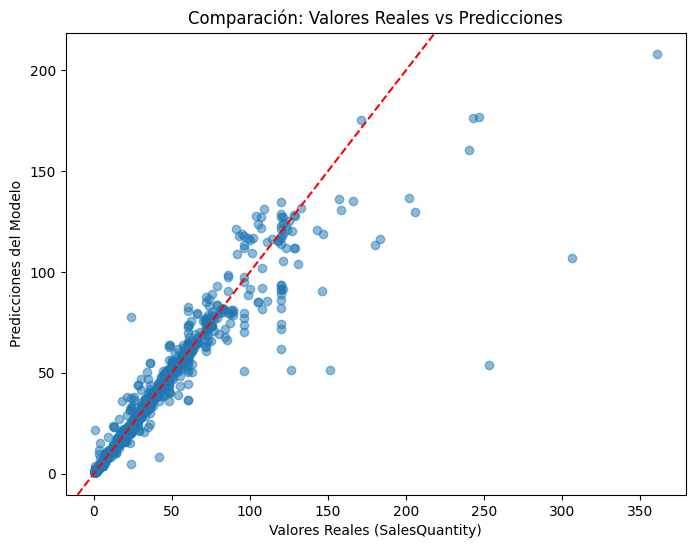

In [ ]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Valores Reales (SalesQuantity)")
plt.ylabel("Predicciones del Modelo")
plt.title("Comparación: Valores Reales vs Predicciones")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  
plt.show()


In [ ]:
import pandas as pd

# Crear un DataFrame con comparaciones
comparacion = pd.DataFrame({
    "Real": y_test[:50].values,  # Tomamos los primeros 20 valores reales
    "Predicho": y_pred_rf[:50]   # Tomamos las primeras 20 predicciones
})

# Agregar columna de diferencia entre el valor real y la predicción
comparacion["Diferencia"] = comparacion["Real"] - comparacion["Predicho"]


# Mostrar la tabla
from IPython.display import display
display(comparacion)



,Real,Predicho,Diferencia
0,2,2.00,0.00
1,1,1.00,0.00
2,1,1.00,0.00
3,1,1.00,0.00
4,2,2.00,0.00
5,3,3.00,0.00
6,2,2.00,0.00
7,1,1.00,0.00
8,1,1.00,0.00
9,1,1.00,0.00
